In [188]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import mglearn

from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier


In [217]:
data = pd.read_csv("Energi_Viborg_Dandas_data.csv")

In [218]:
data

,ID,mslink,XKoordinat,YKoordinat,LedningID,Dobbeltled,EjerKompon,fra_kote,til_kote,Laengde,...,anlag_aar,TransportK,SystemKode,Funktionsk,KategoriAf,TVObsKode,DatoOprett,DatoOpdate,DatoSaneri,DatoUdf
0,87527,87527,526809.08,6250849.80,87527,1.0,1.0,4.500000,3.539986,2.55,...,1996.0,1,1,0,1.0,0.0,2010,2014,NaN,1996.0
1,87528,87528,526794.78,6250869.11,87528,1.0,1.0,4.930000,4.500000,24.03,...,1996.0,1,1,0,1.0,0.0,2010,2014,NaN,1996.0
2,87530,87530,526772.22,6250871.70,87530,1.0,1.0,5.180000,4.930000,22.71,...,1996.0,1,1,0,1.0,0.0,2010,2014,NaN,1996.0
3,87531,87531,526761.65,6250892.87,87531,1.0,1.0,6.247029,5.180000,23.67,...,1996.0,1,1,0,1.0,0.0,2010,2014,NaN,1996.0
4,87539,87539,526729.74,6250869.41,87539,1.0,1.0,5.530000,6.344251,39.61,...,1996.0,1,1,0,1.0,0.0,2010,2014,NaN,1996.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24138,223238,223238,540611.81,6249084.37,223053,1.0,1.0,20.140000,19.550000,48.71,...,2018.0,1,1,0,1.0,0.0,2018,2018,NaN,2018.0
24139,223239,223239,540612.39,6249083.67,223054,1.0,1.0,19.710000,19.120000,46.98,...,2018.0,1,0,0,1.0,0.0,2018,2018,NaN,2018.0
24140,223240,223240,540733.23,6249089.23,223055,1.0,1.0,21.720000,20.140000,121.52,...,2018.0,1,1,0,1.0,0.0,2018,2018,NaN,2018.0
24141,223241,223241,540732.62,6249088.25,223056,1.0,1.0,21.280000,19.710000,120.32,...,2018.0,1,0,0,1.0,0.0,2018,2018,NaN,2018.0


In [219]:
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
import base64
from IPython.core.display import display, HTML
gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'data', 'table': data}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")
HTML_TEMPLATE = """
 <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcompone
nts-lite.js"></script>
 <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/fa
cets-dist/facets-jupyter.html" >
 <facets-overview id="all_data"></facets-overview>
 <script>
 document.querySelector("#all_data").protoInput = "{protostr}";
 </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [192]:
#drop columns not needed after asking the company about the meaning of these features
columns_to_be_removed = ['ID', 'mslink', 'XKoordinat','YKoordinat','LedningID','Dobbeltled','EjerKompon','SystemKode','KategoriAf','DatoUdf']
data=data.drop(columns_to_be_removed,axis='columns')
data[0:-1]


,fra_kote,til_kote,Laengde,Fald,DiameterIn,MaterialeK,anlag_aar,TransportK,Funktionsk,TVObsKode,DatoOprett,DatoOpdate,DatoSaneri
0,4.500000,3.539986,2.55,376.475989,225.0,4.0,1996.0,1,0,0.0,2010,2014,NaN
1,4.930000,4.500000,24.03,17.894299,225.0,4.0,1996.0,1,0,0.0,2010,2014,NaN
2,5.180000,4.930000,22.71,11.008366,225.0,4.0,1996.0,1,0,0.0,2010,2014,NaN
3,6.247029,5.180000,23.67,45.079400,225.0,4.0,1996.0,1,0,0.0,2010,2014,NaN
4,5.530000,6.344251,39.61,-20.556713,150.0,4.0,1996.0,1,0,0.0,2010,2014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24137,21.080000,19.130000,51.54,37.834692,160.0,4.0,2018.0,1,0,0.0,2018,2018,NaN
24138,20.140000,19.550000,48.71,12.112503,250.0,4.0,2018.0,1,0,0.0,2018,2018,NaN
24139,19.710000,19.120000,46.98,12.558536,160.0,4.0,2018.0,1,0,0.0,2018,2018,NaN
24140,21.720000,20.140000,121.52,13.001975,200.0,4.0,2018.0,1,0,0.0,2018,2018,NaN


In [193]:
# in the column DatoSaneri is the date of repairing and if there is no date it means it is not repaired
data['DatoSaneri'].fillna(0, inplace=True)
data

,fra_kote,til_kote,Laengde,Fald,DiameterIn,MaterialeK,anlag_aar,TransportK,Funktionsk,TVObsKode,DatoOprett,DatoOpdate,DatoSaneri
0,4.500000,3.539986,2.55,376.475989,225.0,4.0,1996.0,1,0,0.0,2010,2014,0.0
1,4.930000,4.500000,24.03,17.894299,225.0,4.0,1996.0,1,0,0.0,2010,2014,0.0
2,5.180000,4.930000,22.71,11.008366,225.0,4.0,1996.0,1,0,0.0,2010,2014,0.0
3,6.247029,5.180000,23.67,45.079400,225.0,4.0,1996.0,1,0,0.0,2010,2014,0.0
4,5.530000,6.344251,39.61,-20.556713,150.0,4.0,1996.0,1,0,0.0,2010,2014,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24138,20.140000,19.550000,48.71,12.112503,250.0,4.0,2018.0,1,0,0.0,2018,2018,0.0
24139,19.710000,19.120000,46.98,12.558536,160.0,4.0,2018.0,1,0,0.0,2018,2018,0.0
24140,21.720000,20.140000,121.52,13.001975,200.0,4.0,2018.0,1,0,0.0,2018,2018,0.0
24141,21.280000,19.710000,120.32,13.048537,160.0,4.0,2018.0,1,0,0.0,2018,2018,0.0


In [194]:
print("Number of rows before removing NaNs: {}".format(data.shape[0]))

Number of rows before removing NaNs: 24143


In [195]:
# to check if some value of the features are empty
data = data.dropna()
print("Number of rows after removing NaNs: {}".format(data.shape[0]))

Number of rows after removing NaNs: 24143


In [196]:
# take only the pipes that are broken(by TV insection) now and the repaired ones


data_with_TVObsAndSaneri = data[data['TVObsKode'].isin([1]) | data['DatoSaneri'] > 0]
data_with_TVObsAndSaneri

,fra_kote,til_kote,Laengde,Fald,DiameterIn,MaterialeK,anlag_aar,TransportK,Funktionsk,TVObsKode,DatoOprett,DatoOpdate,DatoSaneri
36,34.720000,33.480000,64.88,19.112207,300.0,1.0,1939.0,1,0,0.0,2010,2014,1997.0
42,39.460000,39.160000,91.75,3.269755,400.0,1.0,1939.0,1,0,1.0,2010,2014,0.0
43,39.710000,39.480000,87.69,2.622876,300.0,1.0,1939.0,1,0,1.0,2010,2014,0.0
64,40.550000,40.080000,52.11,9.019382,250.0,1.0,1945.0,1,0,1.0,2010,2014,0.0
65,40.380000,40.550000,68.39,-2.485744,250.0,1.0,1945.0,1,0,1.0,2010,2014,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23957,11.940000,10.550000,60.32,23.043767,350.0,1.0,1968.0,1,0,1.0,2018,2018,0.0
24062,25.720000,22.820000,44.37,65.359477,160.0,4.0,2017.0,1,0,1.0,2018,2018,0.0
24073,28.490000,27.730000,84.29,9.016491,200.0,1.0,1995.0,1,0,1.0,2018,2018,0.0
24090,27.162706,27.902884,18.82,-39.329328,315.0,4.0,1965.0,1,0,1.0,2018,2018,0.0


In [197]:
print("Number of rows broken now and repaired ones: {}".format(data_with_TVObsAndSaneri.shape[0]))

Number of rows broken now and repaired ones: 2077


In [198]:
#get around 2077 rows with not broken pipes

data_not_broken = data[~data['TVObsKode'].isin([0]) | data['DatoSaneri'] == 0]
data_not_broken = data_not_broken.sample(n=2077) 
data_not_broken

,fra_kote,til_kote,Laengde,Fald,DiameterIn,MaterialeK,anlag_aar,TransportK,Funktionsk,TVObsKode,DatoOprett,DatoOpdate,DatoSaneri
9925,20.78,20.58,34.47,5.802147,180.0,4.0,2000.0,1,0,0.0,2010,2014,0.0
4079,43.94,43.50,36.23,12.144632,200.0,1.0,1974.0,1,0,0.0,2010,2014,0.0
4176,40.57,39.38,45.73,26.022305,200.0,1.0,1947.0,1,0,0.0,2010,2014,0.0
12246,24.93,24.49,30.05,14.642263,200.0,1.0,1978.0,1,0,0.0,2010,2014,0.0
10021,35.11,31.11,76.03,52.610812,200.0,1.0,1978.0,1,0,0.0,2010,2014,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,50.13,49.77,61.07,5.894875,400.0,1.0,1974.0,1,0,0.0,2010,2014,0.0
16564,13.51,13.26,42.08,5.941065,250.0,1.0,2007.0,1,0,0.0,2012,2014,0.0
15445,43.96,43.61,14.38,24.339360,150.0,4.0,2000.0,1,0,0.0,2010,2014,0.0
18564,11.58,11.08,71.10,7.032349,300.0,1.0,1976.0,1,0,0.0,2013,2014,0.0


In [199]:
frames = [data_with_TVObsAndSaneri, data_not_broken]
  
data_final = pd.concat(frames)
data_final

,fra_kote,til_kote,Laengde,Fald,DiameterIn,MaterialeK,anlag_aar,TransportK,Funktionsk,TVObsKode,DatoOprett,DatoOpdate,DatoSaneri
36,34.72,33.48,64.88,19.112207,300.0,1.0,1939.0,1,0,0.0,2010,2014,1997.0
42,39.46,39.16,91.75,3.269755,400.0,1.0,1939.0,1,0,1.0,2010,2014,0.0
43,39.71,39.48,87.69,2.622876,300.0,1.0,1939.0,1,0,1.0,2010,2014,0.0
64,40.55,40.08,52.11,9.019382,250.0,1.0,1945.0,1,0,1.0,2010,2014,0.0
65,40.38,40.55,68.39,-2.485744,250.0,1.0,1945.0,1,0,1.0,2010,2014,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,50.13,49.77,61.07,5.894875,400.0,1.0,1974.0,1,0,0.0,2010,2014,0.0
16564,13.51,13.26,42.08,5.941065,250.0,1.0,2007.0,1,0,0.0,2012,2014,0.0
15445,43.96,43.61,14.38,24.339360,150.0,4.0,2000.0,1,0,0.0,2010,2014,0.0
18564,11.58,11.08,71.10,7.032349,300.0,1.0,1976.0,1,0,0.0,2013,2014,0.0


In [200]:
data = data_final
data

,fra_kote,til_kote,Laengde,Fald,DiameterIn,MaterialeK,anlag_aar,TransportK,Funktionsk,TVObsKode,DatoOprett,DatoOpdate,DatoSaneri
36,34.72,33.48,64.88,19.112207,300.0,1.0,1939.0,1,0,0.0,2010,2014,1997.0
42,39.46,39.16,91.75,3.269755,400.0,1.0,1939.0,1,0,1.0,2010,2014,0.0
43,39.71,39.48,87.69,2.622876,300.0,1.0,1939.0,1,0,1.0,2010,2014,0.0
64,40.55,40.08,52.11,9.019382,250.0,1.0,1945.0,1,0,1.0,2010,2014,0.0
65,40.38,40.55,68.39,-2.485744,250.0,1.0,1945.0,1,0,1.0,2010,2014,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,50.13,49.77,61.07,5.894875,400.0,1.0,1974.0,1,0,0.0,2010,2014,0.0
16564,13.51,13.26,42.08,5.941065,250.0,1.0,2007.0,1,0,0.0,2012,2014,0.0
15445,43.96,43.61,14.38,24.339360,150.0,4.0,2000.0,1,0,0.0,2010,2014,0.0
18564,11.58,11.08,71.10,7.032349,300.0,1.0,1976.0,1,0,0.0,2013,2014,0.0


In [201]:
#get data copied
datacopy = data


# add  age column

#get current year
from datetime import date
now = date.today().year


def age_df(datacopy):

    if (datacopy['TVObsKode'] == 1) and (datacopy['DatoSaneri'] > 0) :
        return (now - datacopy['DatoSaneri'])
    elif (datacopy['TVObsKode'] == 1) and (datacopy['DatoSaneri']== 0):
        return (now - datacopy['anlag_aar'])
    elif (datacopy['TVObsKode'] == 0) and (datacopy['DatoSaneri'] > 0):
        return (now - datacopy['DatoSaneri'])
    elif (datacopy['TVObsKode']== 0) and (datacopy['DatoSaneri']== 0):
        return (now - datacopy['anlag_aar'])

datacopy['Age'] = datacopy.apply(age_df, axis = 1)
datacopy

,fra_kote,til_kote,Laengde,Fald,DiameterIn,MaterialeK,anlag_aar,TransportK,Funktionsk,TVObsKode,DatoOprett,DatoOpdate,DatoSaneri,Age
36,34.72,33.48,64.88,19.112207,300.0,1.0,1939.0,1,0,0.0,2010,2014,1997.0,24.0
42,39.46,39.16,91.75,3.269755,400.0,1.0,1939.0,1,0,1.0,2010,2014,0.0,82.0
43,39.71,39.48,87.69,2.622876,300.0,1.0,1939.0,1,0,1.0,2010,2014,0.0,82.0
64,40.55,40.08,52.11,9.019382,250.0,1.0,1945.0,1,0,1.0,2010,2014,0.0,76.0
65,40.38,40.55,68.39,-2.485744,250.0,1.0,1945.0,1,0,1.0,2010,2014,0.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,50.13,49.77,61.07,5.894875,400.0,1.0,1974.0,1,0,0.0,2010,2014,0.0,47.0
16564,13.51,13.26,42.08,5.941065,250.0,1.0,2007.0,1,0,0.0,2012,2014,0.0,14.0
15445,43.96,43.61,14.38,24.339360,150.0,4.0,2000.0,1,0,0.0,2010,2014,0.0,21.0
18564,11.58,11.08,71.10,7.032349,300.0,1.0,1976.0,1,0,0.0,2013,2014,0.0,45.0


In [202]:
# add a column 'PipeStatus'
# 1 as broken and 0 as not broken

def broken_df(datacopy):

    if (datacopy['TVObsKode'] == 1) and (datacopy['DatoSaneri'] < (datacopy['DatoOpdate'])) and (datacopy['DatoSaneri'] != 0):
        return 1
    elif (datacopy['TVObsKode'] == 1) and (datacopy['DatoSaneri'] >= (datacopy['DatoOpdate'])) and (datacopy['DatoSaneri'] != 0):
        return 0
    elif (datacopy['TVObsKode'] == 1) and (datacopy['DatoSaneri']== 0):
        return 1
    elif (datacopy['TVObsKode'] == 0) and (datacopy['DatoSaneri'] > 0):
        return 0
    elif (datacopy['TVObsKode']== 0) and (datacopy['DatoSaneri']== 0):
        return 0

datacopy['PipeStatus'] = datacopy.apply(broken_df, axis = 1)
datacopy


,fra_kote,til_kote,Laengde,Fald,DiameterIn,MaterialeK,anlag_aar,TransportK,Funktionsk,TVObsKode,DatoOprett,DatoOpdate,DatoSaneri,Age,PipeStatus
36,34.72,33.48,64.88,19.112207,300.0,1.0,1939.0,1,0,0.0,2010,2014,1997.0,24.0,0.0
42,39.46,39.16,91.75,3.269755,400.0,1.0,1939.0,1,0,1.0,2010,2014,0.0,82.0,1.0
43,39.71,39.48,87.69,2.622876,300.0,1.0,1939.0,1,0,1.0,2010,2014,0.0,82.0,1.0
64,40.55,40.08,52.11,9.019382,250.0,1.0,1945.0,1,0,1.0,2010,2014,0.0,76.0,1.0
65,40.38,40.55,68.39,-2.485744,250.0,1.0,1945.0,1,0,1.0,2010,2014,0.0,76.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,50.13,49.77,61.07,5.894875,400.0,1.0,1974.0,1,0,0.0,2010,2014,0.0,47.0,0.0
16564,13.51,13.26,42.08,5.941065,250.0,1.0,2007.0,1,0,0.0,2012,2014,0.0,14.0,0.0
15445,43.96,43.61,14.38,24.339360,150.0,4.0,2000.0,1,0,0.0,2010,2014,0.0,21.0,0.0
18564,11.58,11.08,71.10,7.032349,300.0,1.0,1976.0,1,0,0.0,2013,2014,0.0,45.0,0.0


In [203]:
#drop columns not needed after adding new features

columns_to_be_removed = ['DatoOprett', 'DatoOpdate']
datacopy=datacopy.drop(columns_to_be_removed,axis='columns')
datacopy[0:-1]

,fra_kote,til_kote,Laengde,Fald,DiameterIn,MaterialeK,anlag_aar,TransportK,Funktionsk,TVObsKode,DatoSaneri,Age,PipeStatus
36,34.72,33.48,64.88,19.112207,300.0,1.0,1939.0,1,0,0.0,1997.0,24.0,0.0
42,39.46,39.16,91.75,3.269755,400.0,1.0,1939.0,1,0,1.0,0.0,82.0,1.0
43,39.71,39.48,87.69,2.622876,300.0,1.0,1939.0,1,0,1.0,0.0,82.0,1.0
64,40.55,40.08,52.11,9.019382,250.0,1.0,1945.0,1,0,1.0,0.0,76.0,1.0
65,40.38,40.55,68.39,-2.485744,250.0,1.0,1945.0,1,0,1.0,0.0,76.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4703,19.36,18.70,46.18,14.291901,200.0,1.0,1963.0,1,0,0.0,0.0,58.0,0.0
6637,50.13,49.77,61.07,5.894875,400.0,1.0,1974.0,1,0,0.0,0.0,47.0,0.0
16564,13.51,13.26,42.08,5.941065,250.0,1.0,2007.0,1,0,0.0,0.0,14.0,0.0
15445,43.96,43.61,14.38,24.339360,150.0,4.0,2000.0,1,0,0.0,0.0,21.0,0.0


# Correleation Analysis

In [204]:
df = pd.concat([datacopy],axis=1)
# df.drop('Classifier', axis=1, inplace=True

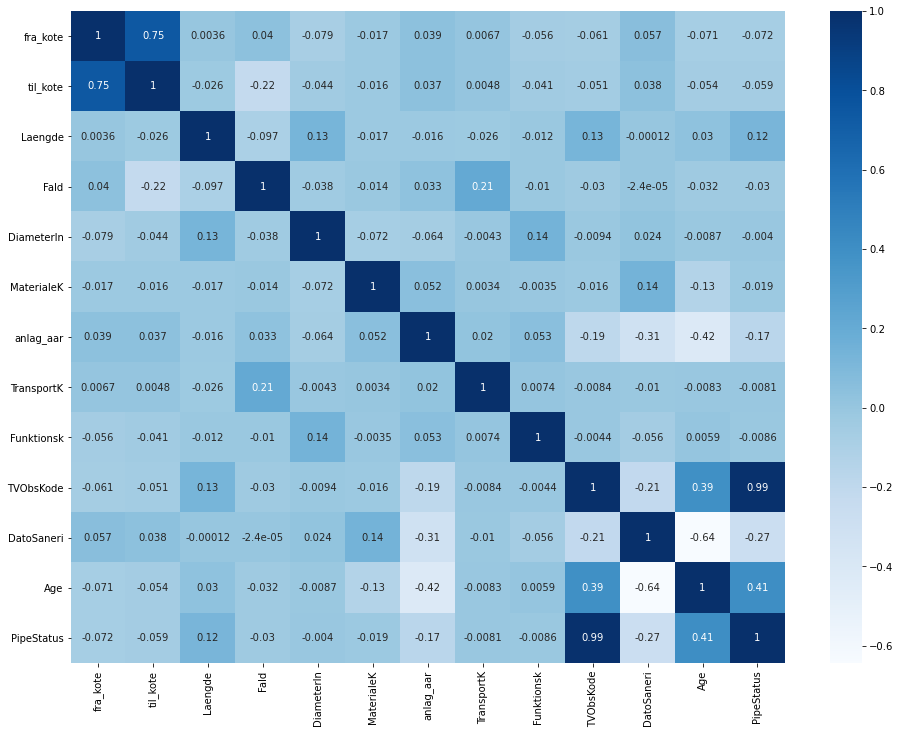

In [205]:
plt.figure(figsize=(16,12))
corrMatrix=df.corr()
sns.heatmap(corrMatrix, cmap="Blues", annot=True)
plt.show()

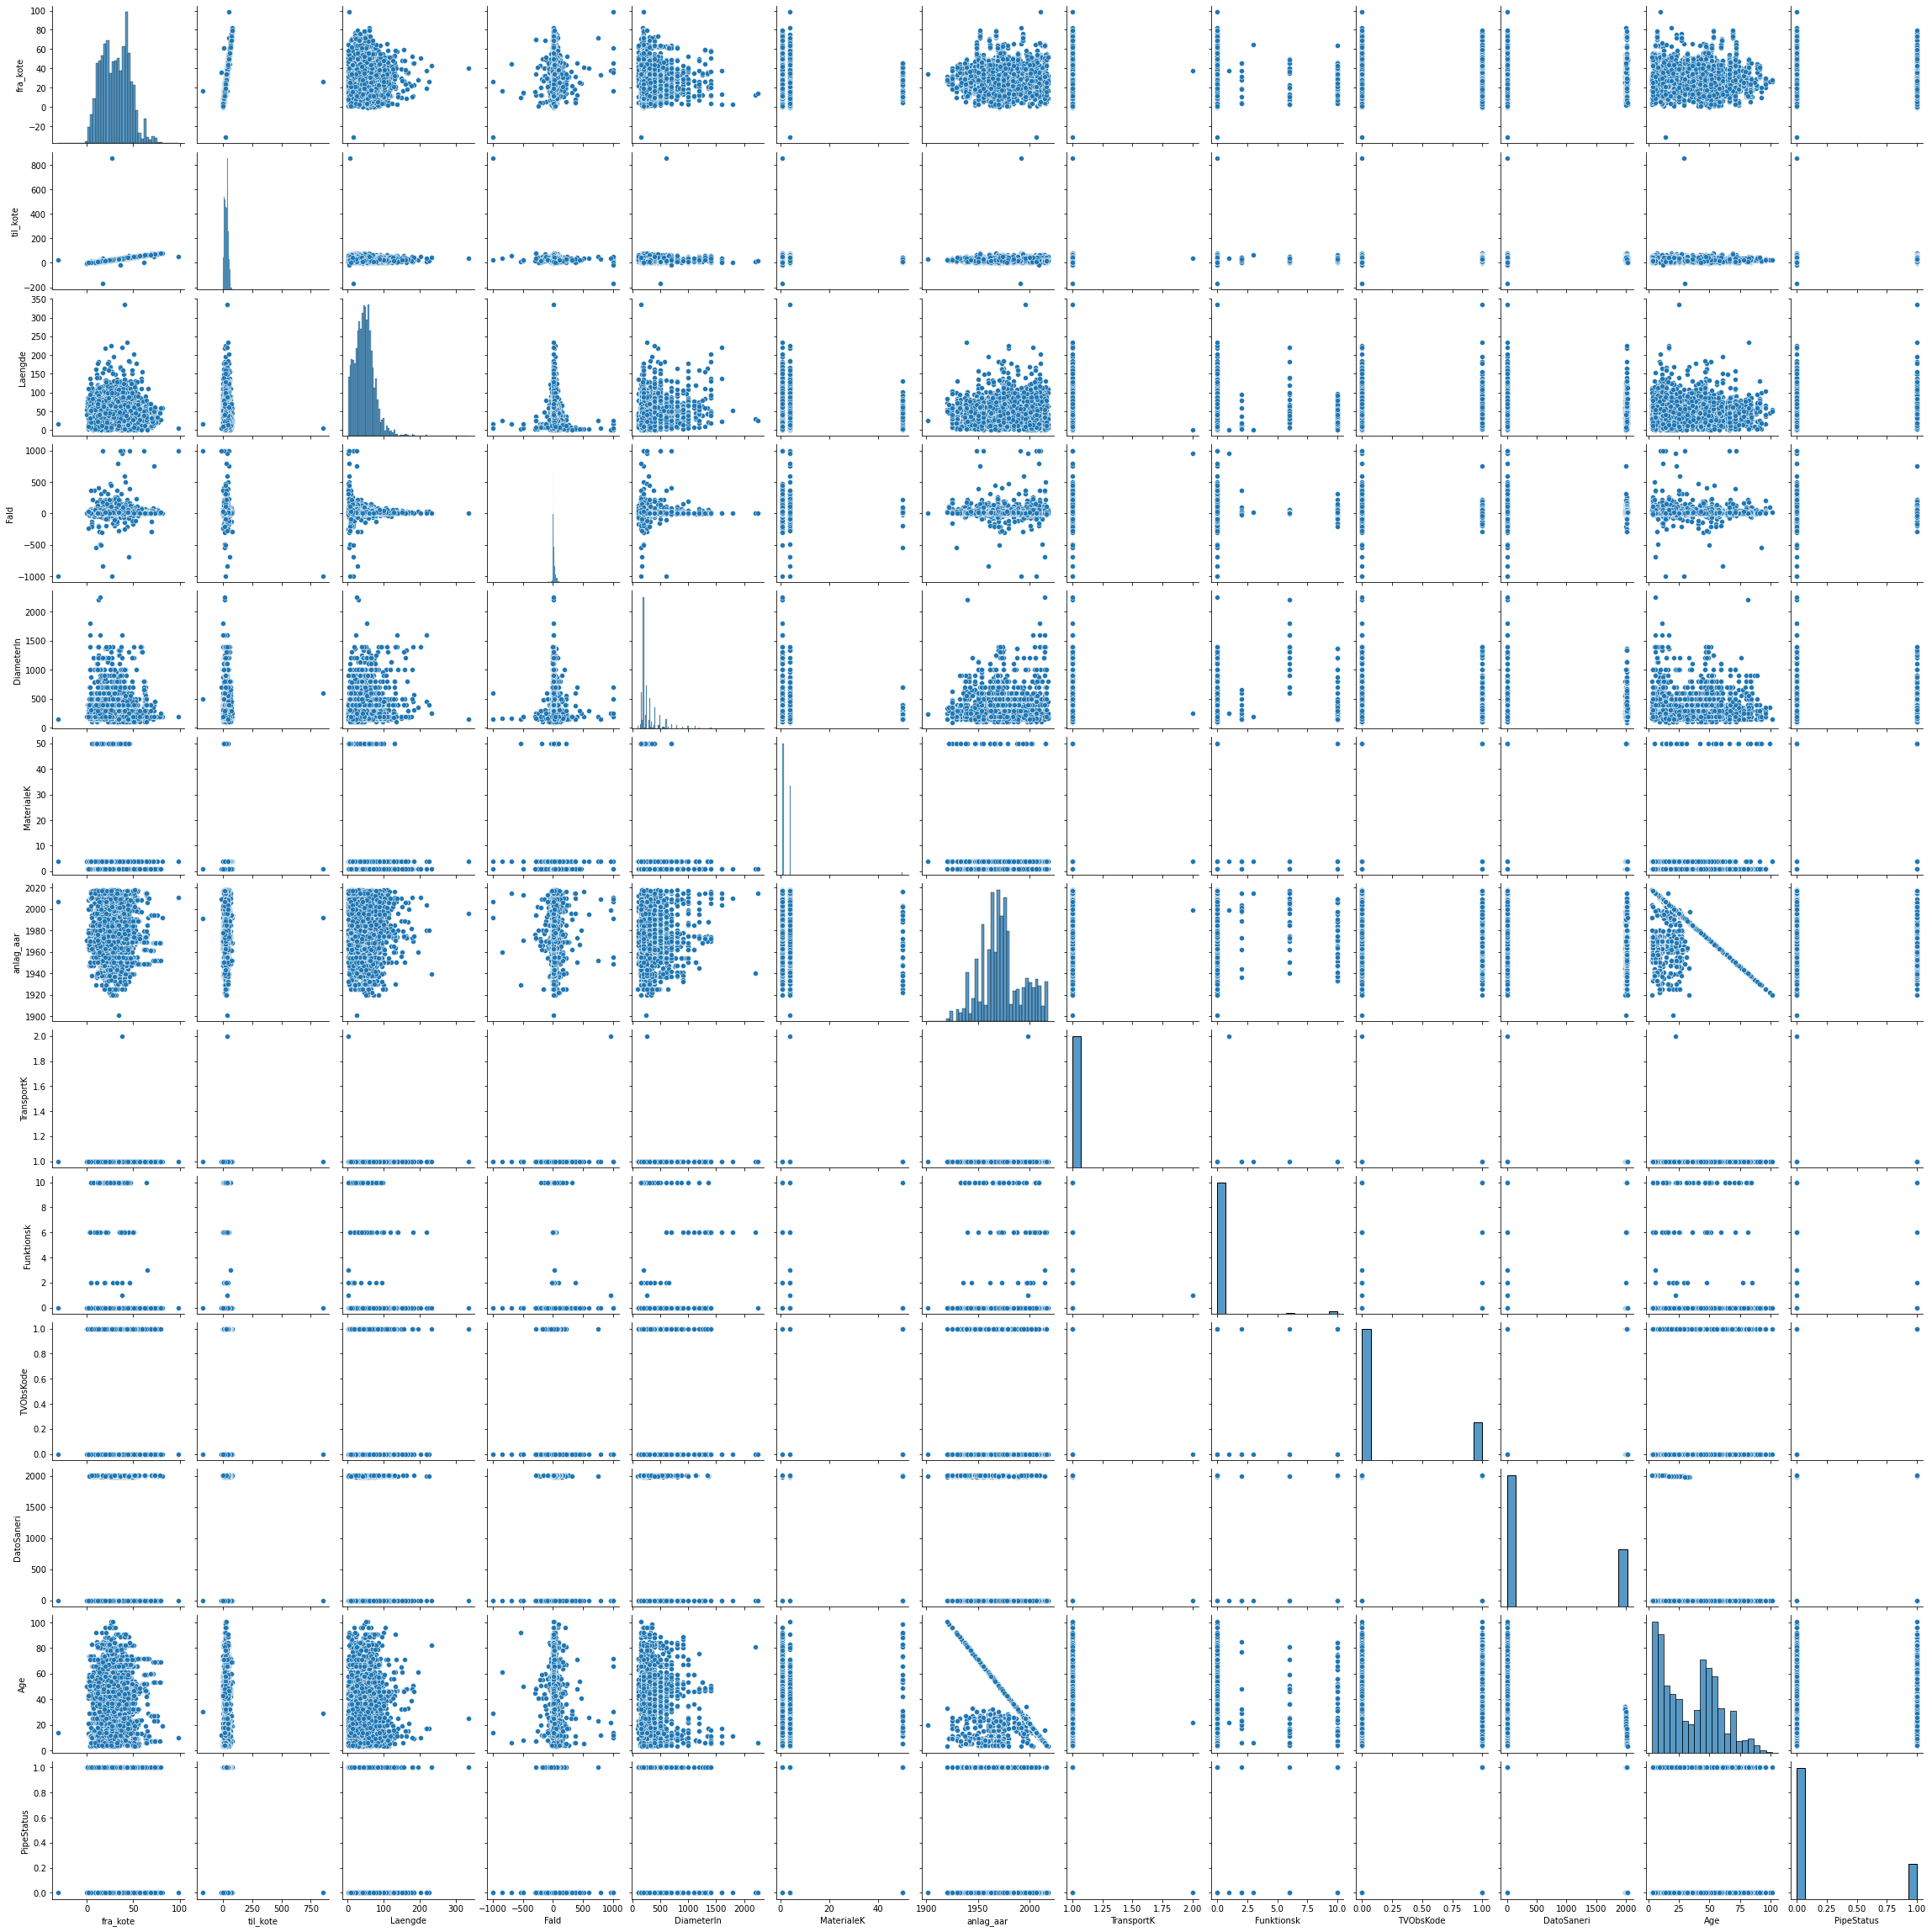

In [206]:
pairplot = sns.pairplot(df)

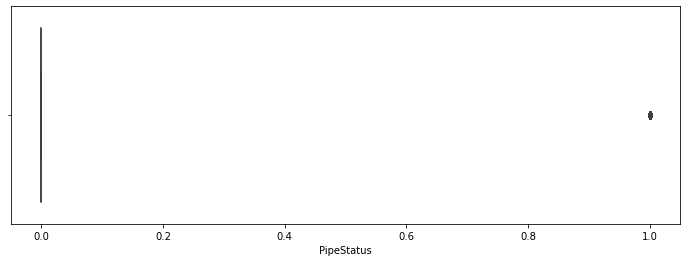

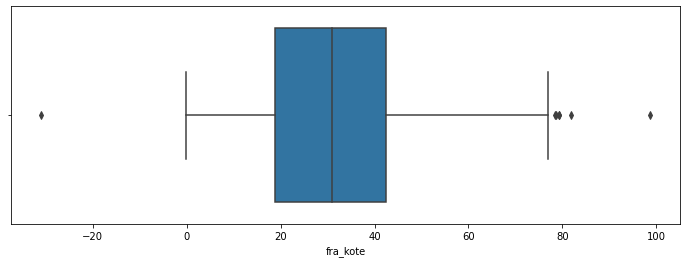

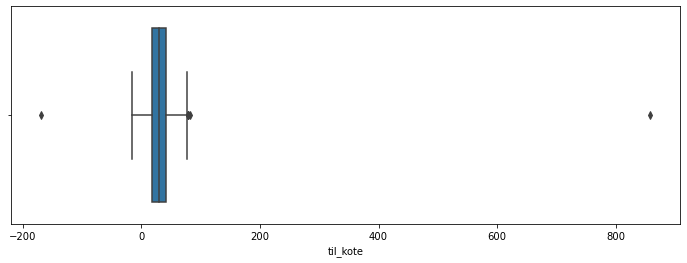

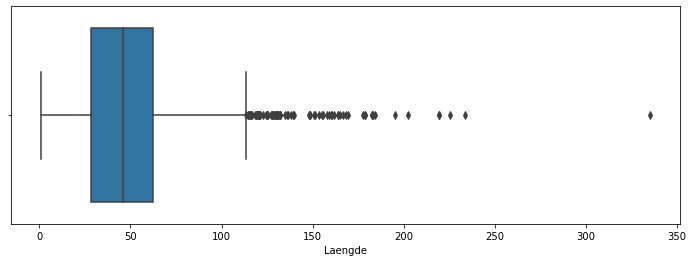

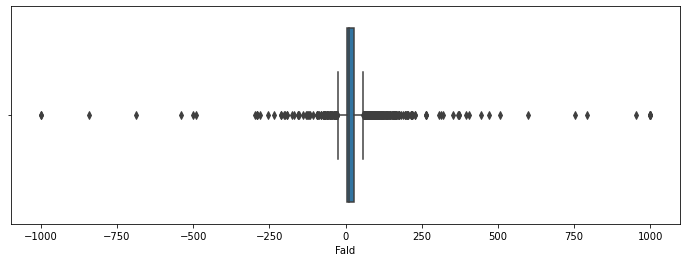

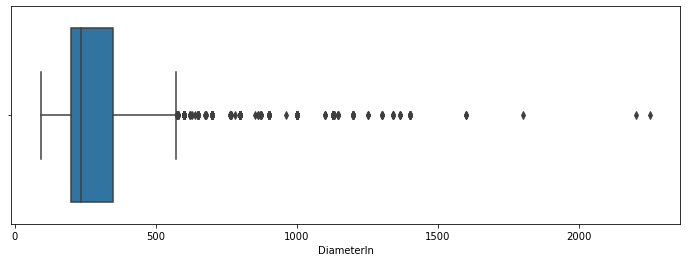

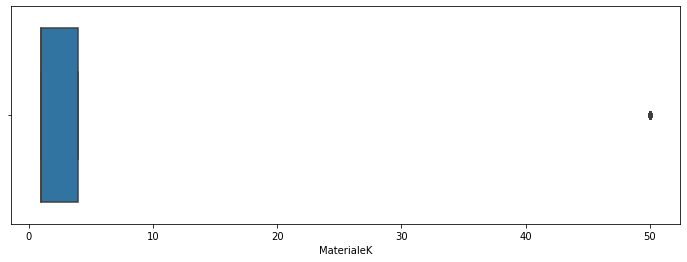

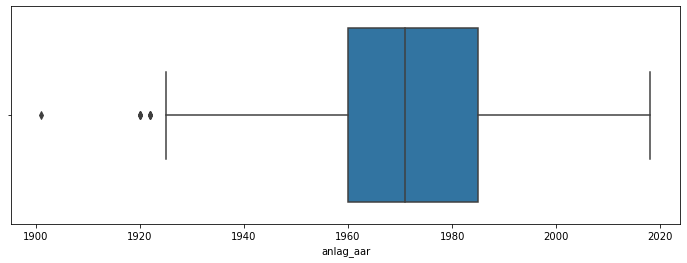

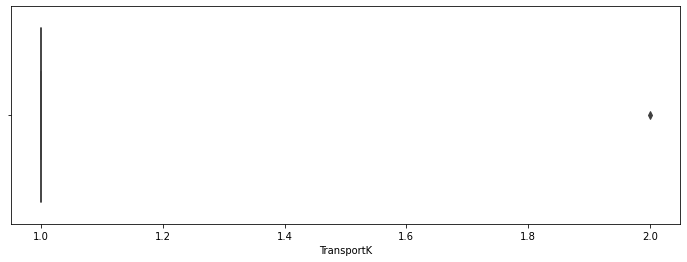

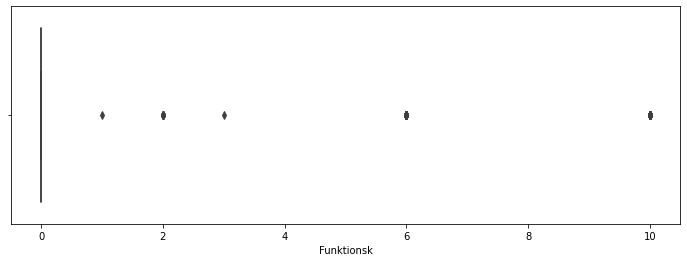

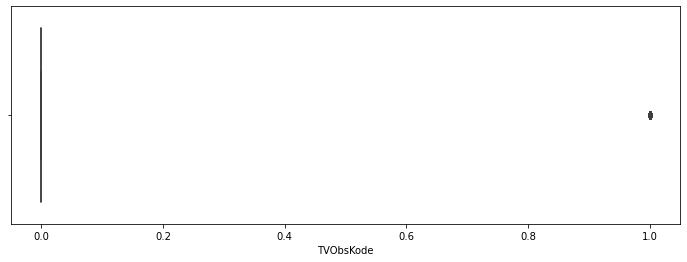

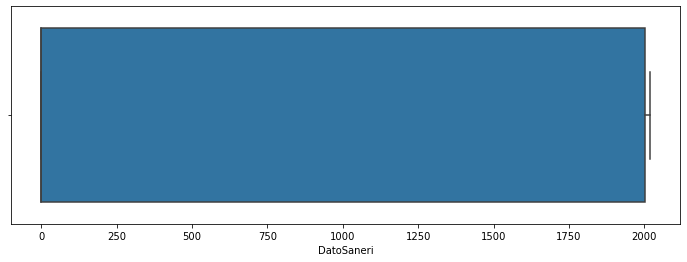

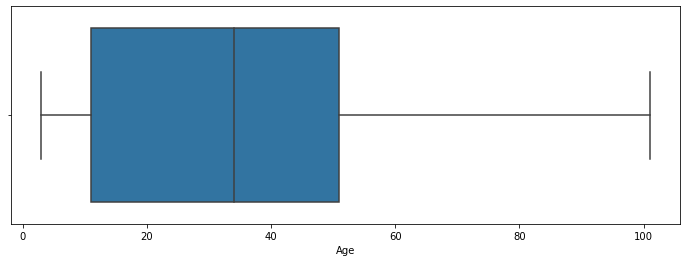

In [208]:
columns_to_be_removed = ['PipeStatus']
data_features= datacopy.drop(columns_to_be_removed,axis='columns')
columns_to_be_removed = ['fra_kote','til_kote', 'Laengde','Fald','DiameterIn','MaterialeK','anlag_aar','TransportK','Funktionsk','TVObsKode','DatoSaneri','Age']
data_target=datacopy.drop(columns_to_be_removed,axis='columns')

for j in pd.DataFrame(data_target):
 fig, ax = plt.subplots(figsize=(12,4))
 sns.boxplot(x=j, data=data_target, ax=ax)
for i in pd.DataFrame(data_features):
 fig, ax = plt.subplots(figsize=(12,4))
 sns.boxplot(x=i, data=data_features, ax=ax)


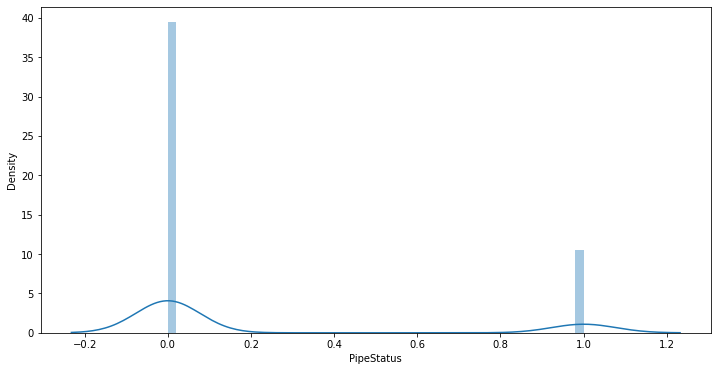

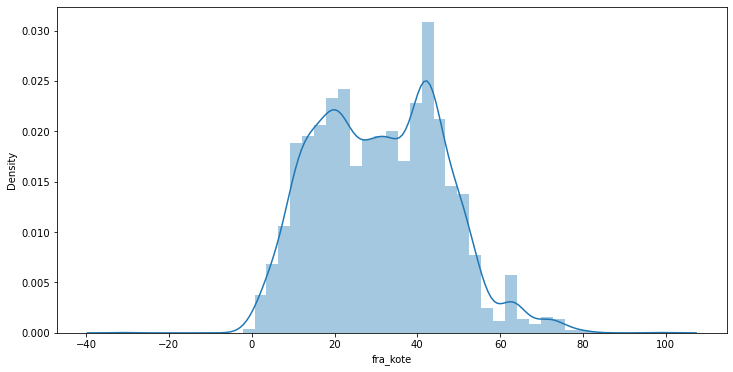

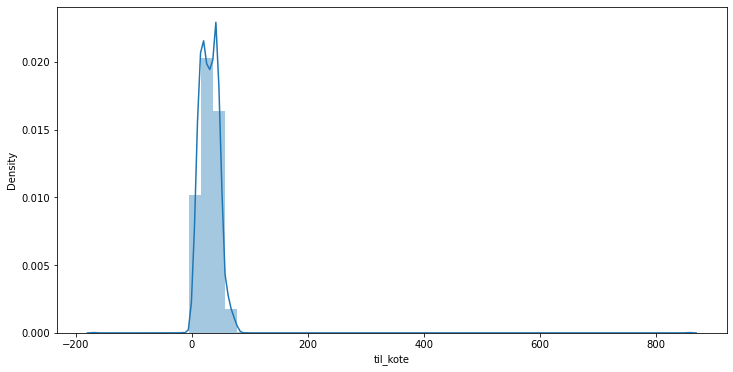

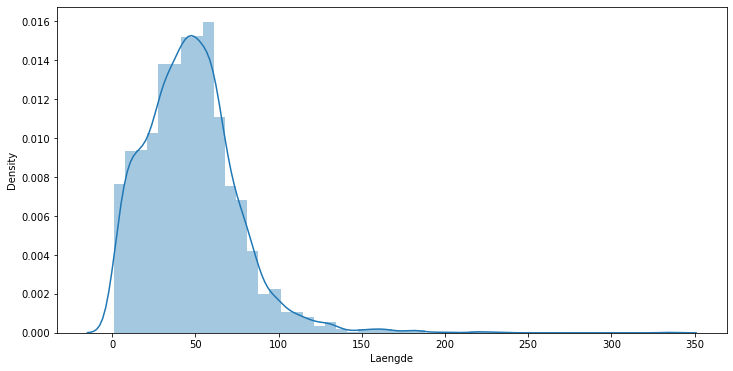

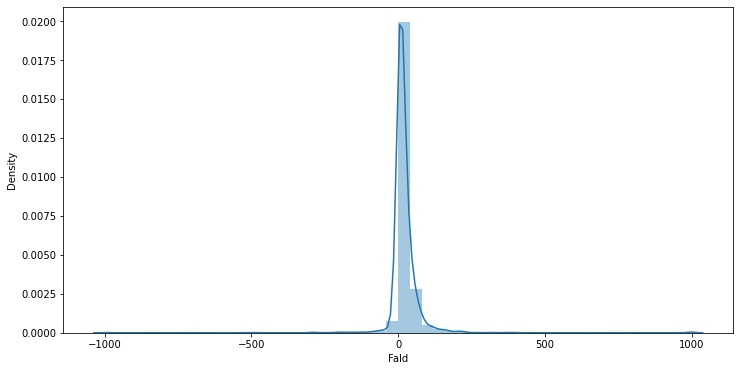

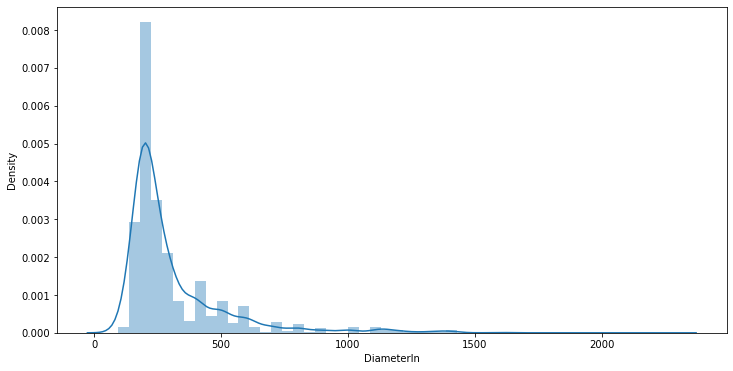

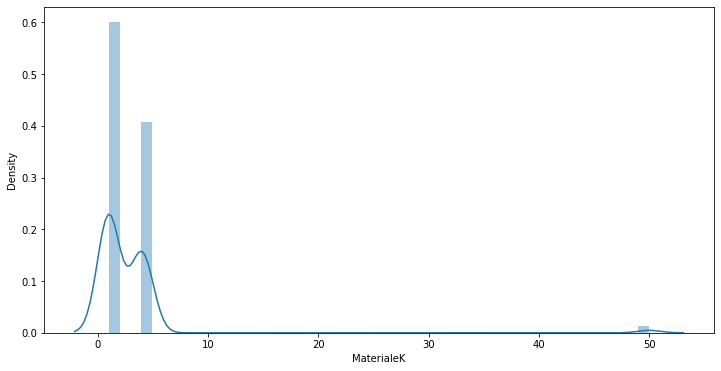

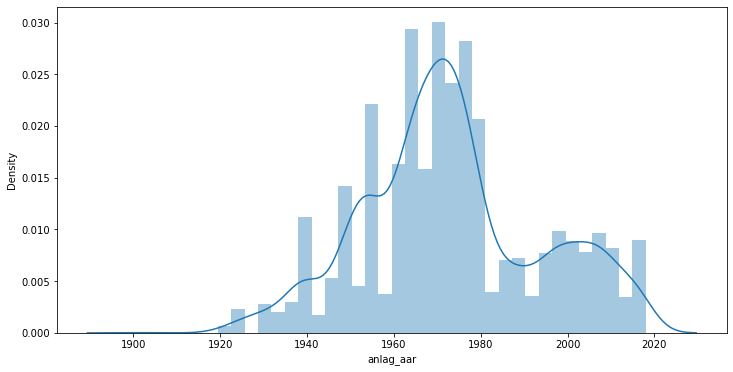

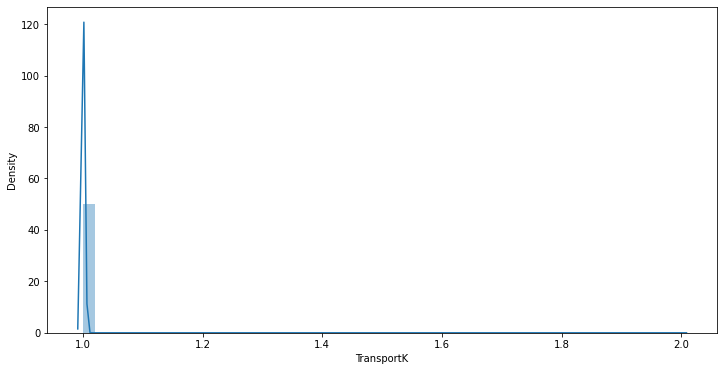

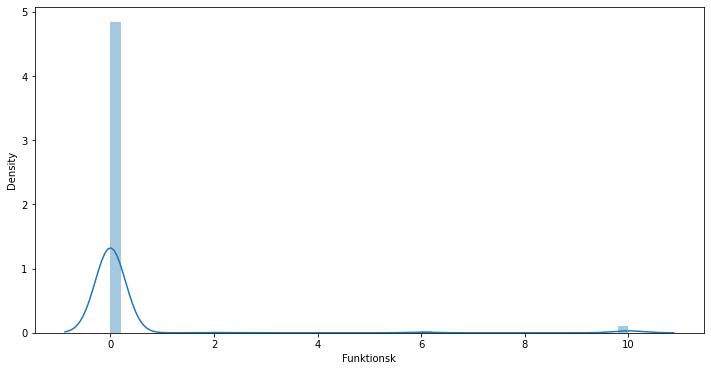

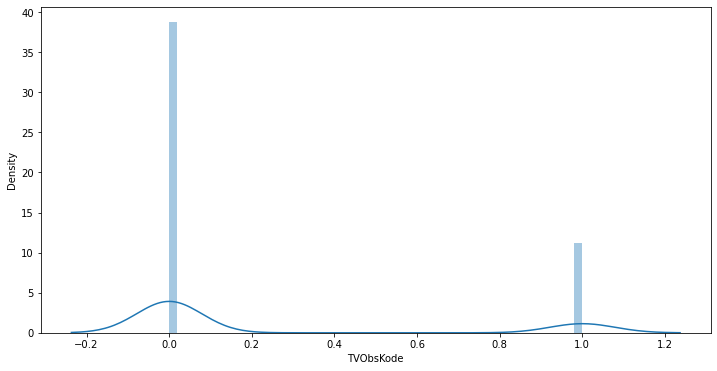

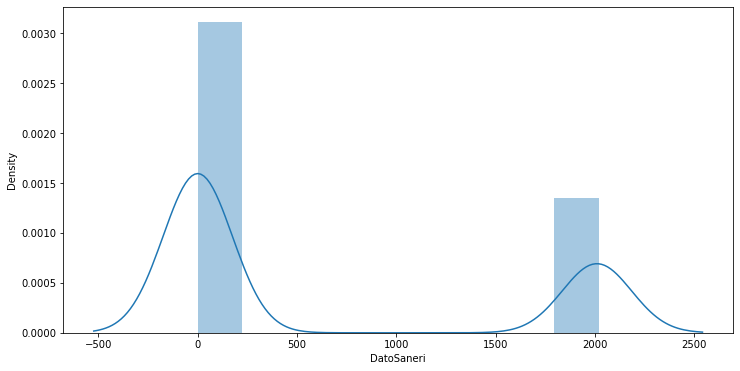

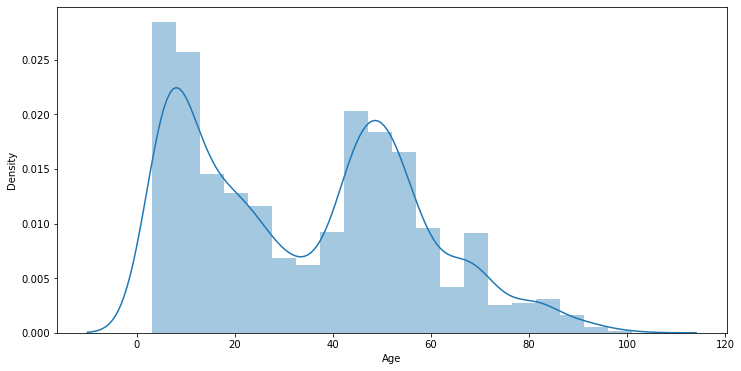

In [209]:
#df.hist(bins=50,figsize=(16,12))
for j in pd.DataFrame(data_target):
 fig, ax = plt.subplots(figsize=(12,6))
 sns.distplot(data_target[j], ax=ax)
for i in pd.DataFrame(data_features):
 fig, ax = plt.subplots(figsize=(12,6))
 sns.distplot(data_features[i], ax=ax)

In [211]:
#To sum how many outliers in all features.
Q1 = data_features.quantile(0.15)
Q3 = data_features.quantile(0.85)
IQR = Q3 - Q1
((data_features < (Q1 - 1.5 * IQR)) |(data_features > (Q3 + 1.5 * IQR))).sum()

# remove, keep or replace outliers

fra_kote        1
til_kote        2
Laengde        28
Fald          197
DiameterIn    119
MaterialeK     51
anlag_aar       0
TransportK      1
Funktionsk    133
TVObsKode       0
DatoSaneri      0
Age             0
dtype: int64